# Inferring An Unknown Scalar From Noisy Measurements Using A Linear Gaussian System

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# the mean and the variance of the prior for the unknown scalar x
mu_x , sigma_x = 1.0, 0.5
# the unknown scalar is generated
x = np.random.default_rng(seed=7843).normal(mu_x, sigma_x)
print('x=', x)

x= 0.4421001128982699


In [3]:
# number of measurements
N = 100
# the measurement noise is defined
mu_noise = 0
sigma_noise = 0.5
epsilon = np.random.default_rng(seed=5464189).normal(mu_noise, sigma_noise, size=N)

In [4]:
# the measurements are defined
y = x + epsilon

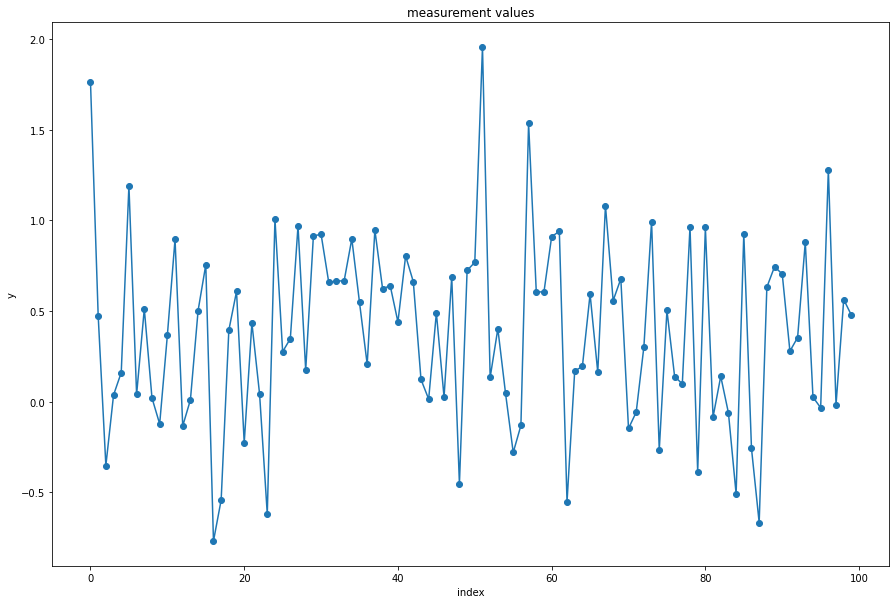

In [5]:
# the measurements are plotted
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(y, '-o')
_ = plt.xlabel('index')
_ = plt.ylabel('y')
_ = ax.set_title('measurement values')

In [6]:
# the mean of the measurements is computed
y_bar = y.mean()
print('mean of the measurements=', y_bar)

mean of the measurements= 0.38220062788743414


In [7]:
# precision of prior
lambda_0 = 1.0 / sigma_x
# precision of likelihood
lambda_y = 1.0 / (sigma_x + sigma_noise)
# mean of the posterior
mu_posterior = ((N*lambda_y)/(lambda_0+N*lambda_y))*y_bar + (lambda_0/(lambda_0+N*lambda_y))*mu_x
print('estimate for x:', mu_posterior)
# variance of the posterior
var_posterior = 1.0/(lambda_0+N*lambda_y)
print('standars deviation of the estimate for x:', np.sqrt(var_posterior))
# percentage error in the estimate
percentage_error = 100.0*((mu_posterior-x)/x)
print('percentage error in the estimate:', percentage_error)

estimate for x: 0.39431434106611185
standars deviation of the estimate for x: 0.09901475429766743
percentage error in the estimate: -10.80881240198956


In [8]:
from scipy.stats import norm

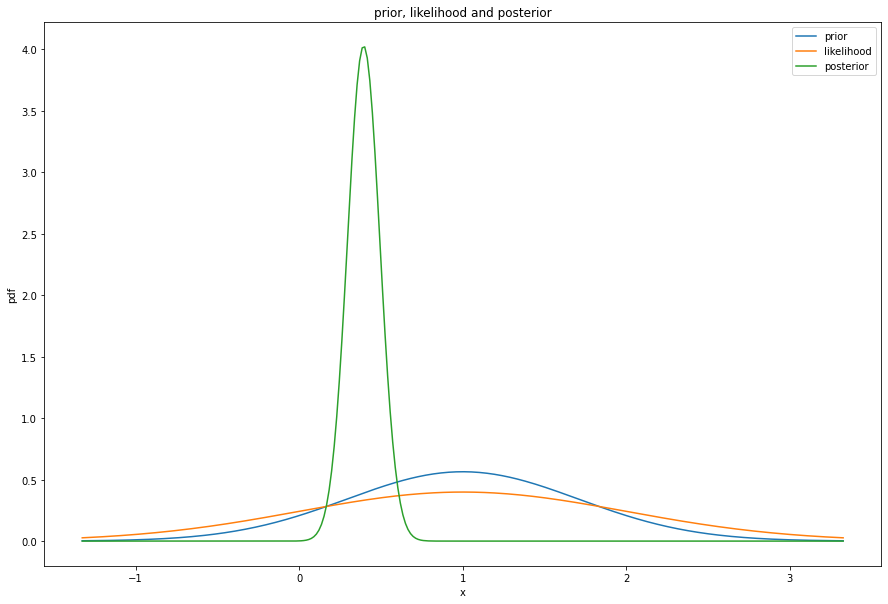

In [9]:
# prior, likelihood and posterior distributions are defined
rv_prior = norm(loc=mu_x, scale=np.sqrt(sigma_x))
rv_likelihood = norm(loc=mu_x+mu_noise, scale=np.sqrt(lambda_y))
rv_posterior = norm(loc=mu_posterior, scale=np.sqrt(var_posterior))

# the x axis is created
x_min = np.amin(np.array([rv_prior.ppf(0.01), rv_likelihood.ppf(0.01), rv_posterior.ppf(0.01)]))
x_max = np.amax(np.array([rv_prior.ppf(0.99), rv_likelihood.ppf(0.99), rv_posterior.ppf(0.99)]))
x_axis = np.linspace(x_min, x_max, 300)

# prior, likelihood and posterior distributions are plotted
fig, ax = plt.subplots(figsize=(15, 10))
_ = ax.plot(x_axis, rv_prior.pdf(x_axis), label='prior')
_ = ax.plot(x_axis, rv_likelihood.pdf(x_axis), label='likelihood')
_ = ax.plot(x_axis, rv_posterior.pdf(x_axis), label='posterior')
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels)
_ = ax.set_title('prior, likelihood and posterior')
_ = plt.xlabel('x')
_ = plt.ylabel('pdf')

As can be observed from the plot of the distributions, the posterior pdf zooms around the unknown scalar x.

# References
[1] Machine Learning A Probabilistic Perspective, Kevin P. Murphy.

[2] Bayes Rule For A Linear Gaussian System, <https://saffetgokcensen.github.io/blog/2020/07/08/bayes-rule-for-a-linear-gaussian-system>